<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
# Show Sample of Data
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
485,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
38,48,F,ATA,120,177,1,ST,148,N,0.0,Up,0
388,55,M,ASY,140,0,0,Normal,83,N,0.0,Flat,1


In [4]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 918
Number of Columns : 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Check NaN Value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Describe Numiric Data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


####    All this an errors in data collection
- the min value in  2 columns = 0 (RestingBP, Cholesterol) is not realistic
- An Oldpeak value of -2.6 mm is not realistic because ST depression (Oldpeak) cannot be negative

In [8]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Age,918,0,0.0,50
Sex,918,0,0.0,2
ChestPainType,918,0,0.0,4
RestingBP,918,0,0.0,67
Cholesterol,918,0,0.0,222
FastingBS,918,0,0.0,2
RestingECG,918,0,0.0,3
MaxHR,918,0,0.0,119
ExerciseAngina,918,0,0.0,2
Oldpeak,918,0,0.0,53


In [9]:
# Check Dublication
df.duplicated().sum()

0

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Handling Missing Data (Nulls)
    </h1>
    </div>

## Handle not realistic value (RestingBP, Cholesterol,Oldpeak)

#### The negative reviews are real but were entered incorrectly because Oldpeak should be positive

In [10]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


In [11]:
# Change negative values to positive values
df['Oldpeak'] = df['Oldpeak'].abs()

####  Convert those 0's values in these 2 columns (RestingBP, Cholesterol) to determine how many missing valuesin each feature in our data

In [12]:
df[['RestingBP','Cholesterol']] = df[['RestingBP','Cholesterol']].replace(0,np.nan)

In [13]:
# Show Number of Missing Values (NaN)
df[['RestingBP','Cholesterol']].isna().sum()

RestingBP        1
Cholesterol    172
dtype: int64

In [14]:
# Show Status of HeartDisease which NaN in RestingBP
df[df['RestingBP'].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,NaN,NaN,0,Normal,155,N,1.5,Flat,1


In [15]:
# Fill Missing Value with median of people has Heart Disease
df['RestingBP'] = df['RestingBP'].fillna(df.groupby('HeartDisease')['RestingBP'].median()[1])

In [16]:
temp = df.groupby('HeartDisease')['Cholesterol'].median()
df.loc[(df['Cholesterol'].isna()) & (df['HeartDisease'] == 0), 'Cholesterol'] = temp[0]
df.loc[(df['Cholesterol'].isna()) & (df['HeartDisease'] == 1), 'Cholesterol'] = temp[1]

In [17]:
# After Fill Missing Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [18]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 0 outliers detected
RestingBP: 27 outliers detected
Cholesterol: 41 outliers detected
MaxHR: 2 outliers detected
Oldpeak: 15 outliers detected


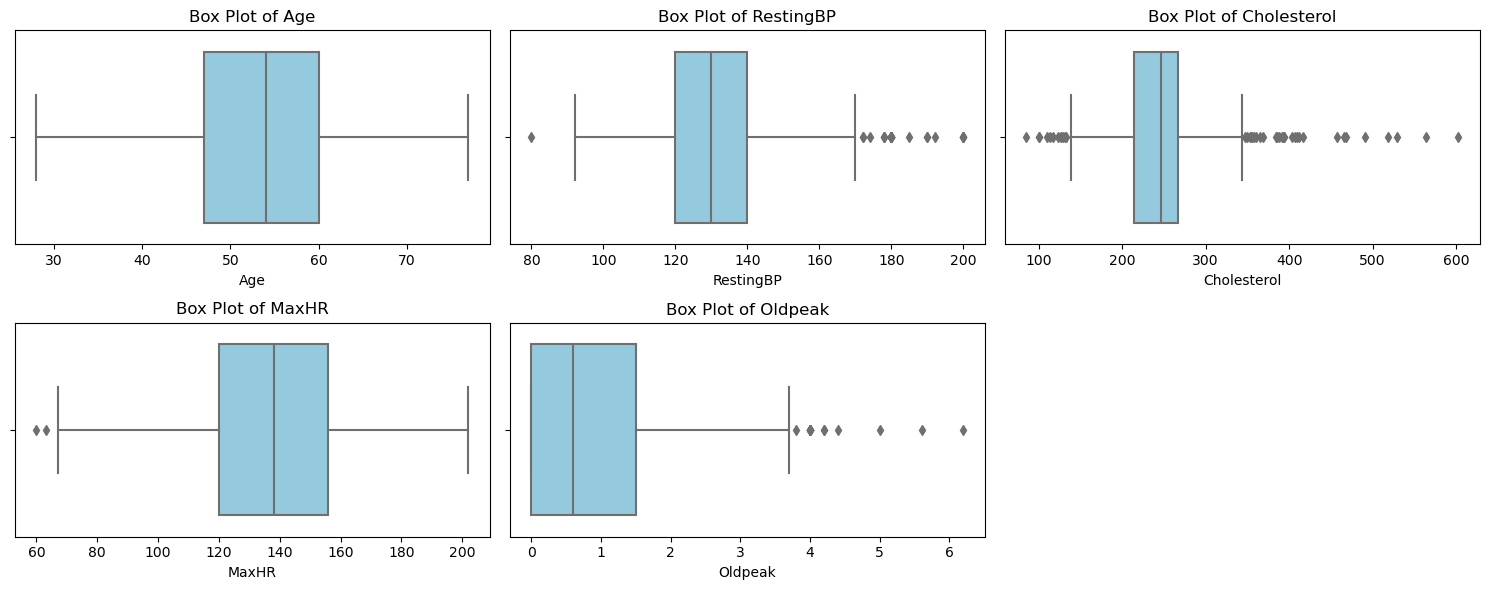

In [19]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [20]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [21]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 824
Number of Columns : 12


#### Cleaned Data BoxPlot To Show Outliers

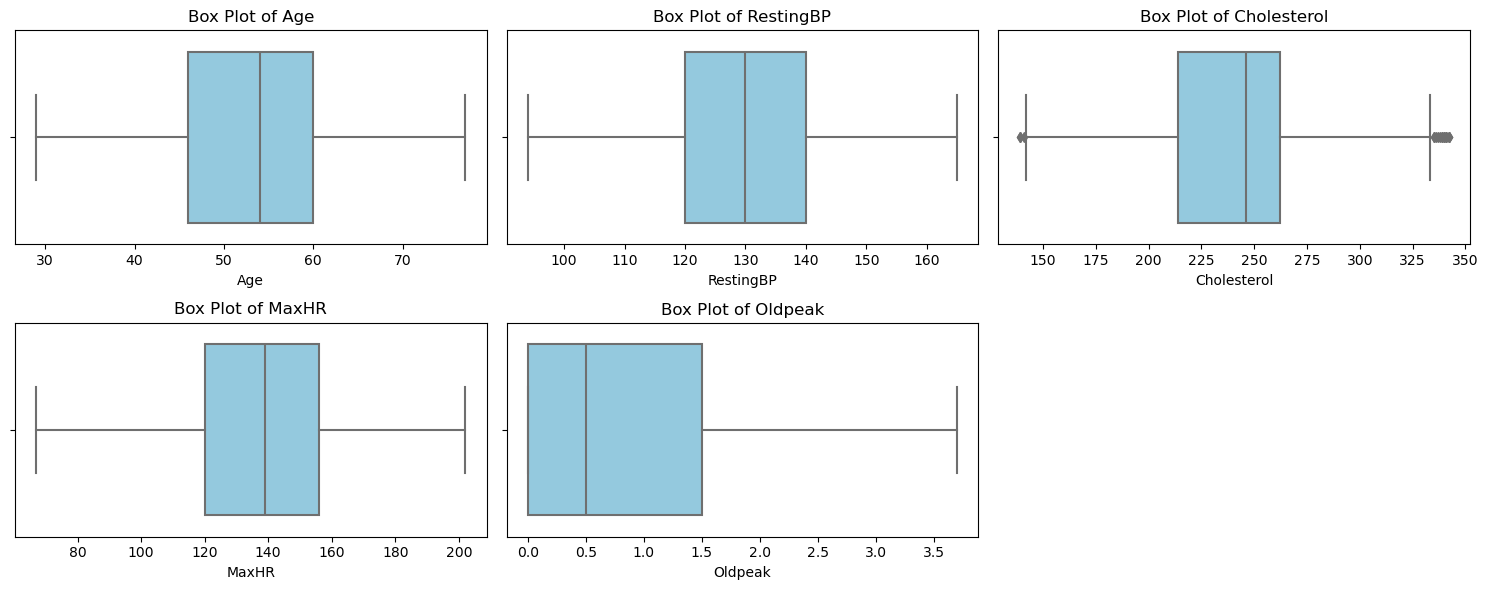

In [22]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [23]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,63,M,ASY,130.0,308.0,0,Normal,138,Y,2.0,Flat,1
731,68,M,NAP,118.0,277.0,0,Normal,151,N,1.0,Up,0
312,69,M,ASY,137.0,246.0,0,ST,104,Y,1.6,Flat,1
706,67,M,ASY,100.0,299.0,0,LVH,125,Y,0.9,Flat,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1


In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             824 non-null    int64  
 1   Sex             824 non-null    object 
 2   ChestPainType   824 non-null    object 
 3   RestingBP       824 non-null    float64
 4   Cholesterol     824 non-null    float64
 5   FastingBS       824 non-null    int64  
 6   RestingECG      824 non-null    object 
 7   MaxHR           824 non-null    int64  
 8   ExerciseAngina  824 non-null    object 
 9   Oldpeak         824 non-null    float64
 10  ST_Slope        824 non-null    object 
 11  HeartDisease    824 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 77.4+ KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Age distribution in the data

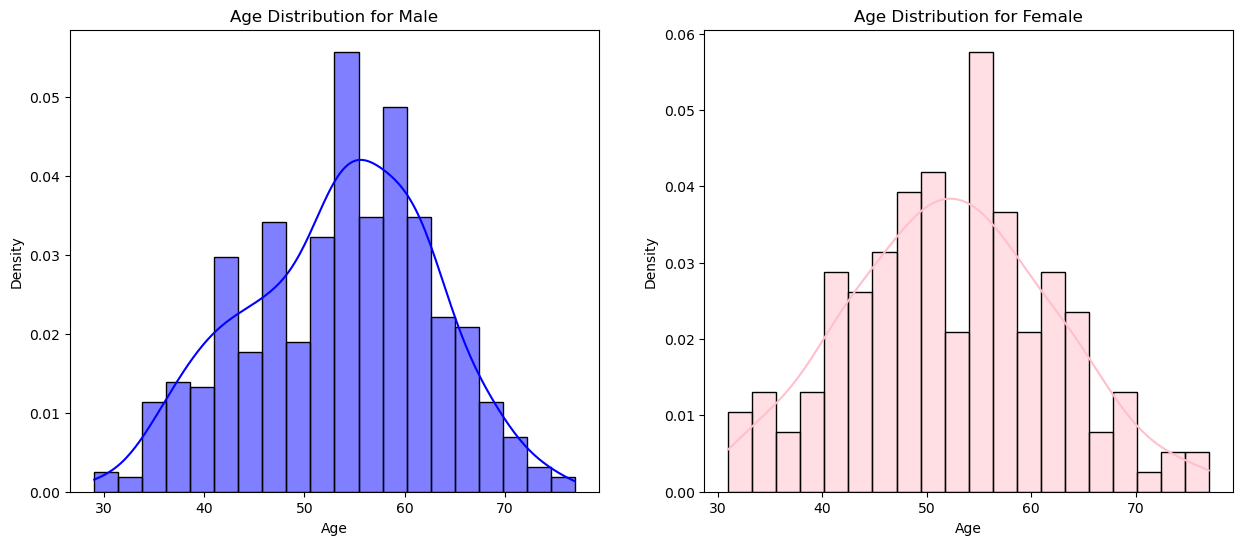

In [25]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)

sns.histplot(df_cleaned[df['Sex'] == 'M']['Age'], color='blue', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Male')

plt.subplot(1,2,2)

sns.histplot(df_cleaned[df['Sex'] == 'F']['Age'], color='pink', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Female')

plt.show()

- Most Ranges of Age between 50 to 60 

In [26]:
fig = px.pie(values = df_cleaned['Sex'].value_counts(),
             names = ['Male','Female'],
             template = 'plotly_dark',
             title = 'The Percentage of Type of Gender in the Data'
             ).update_traces(textinfo='label+percent')

fig.show()

- Males are the dominant Category in the data

## Chest Pain Type For each gender of Sex

In [27]:
fig = px.bar(df_cleaned[df_cleaned['Sex'] == 'M']['ChestPainType'].value_counts(),
             color = df_cleaned[df_cleaned['Sex'] == 'M']['ChestPainType'].value_counts().index,
             template = 'plotly_dark',
             title = 'Most Chest Pain Type For Male',
             labels = {'value':'Count'},
             text_auto = True
             )
fig.show()

In [28]:
fig = px.bar(df_cleaned[df_cleaned['Sex'] == 'F']['ChestPainType'].value_counts(),
             color = df_cleaned[df_cleaned['Sex'] == 'F']['ChestPainType'].value_counts().index,
             template = 'plotly_dark',
             title = 'Most Chest Pain Type For Female',
             labels = {'value':'Count'},
             text_auto = True
             )
fig.show()

In [29]:
fig = px.bar(df_cleaned['ChestPainType'].value_counts(),
             color = df_cleaned['ChestPainType'].value_counts().index,
             template = 'plotly_dark',
             title = 'Most Chest Pain Type In General',
             labels = {'value':'Count'},
             text_auto = True
             )
fig.show()

#### Most Chest Pain Type 
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina

## Distribution of Resting Blood Pressure 

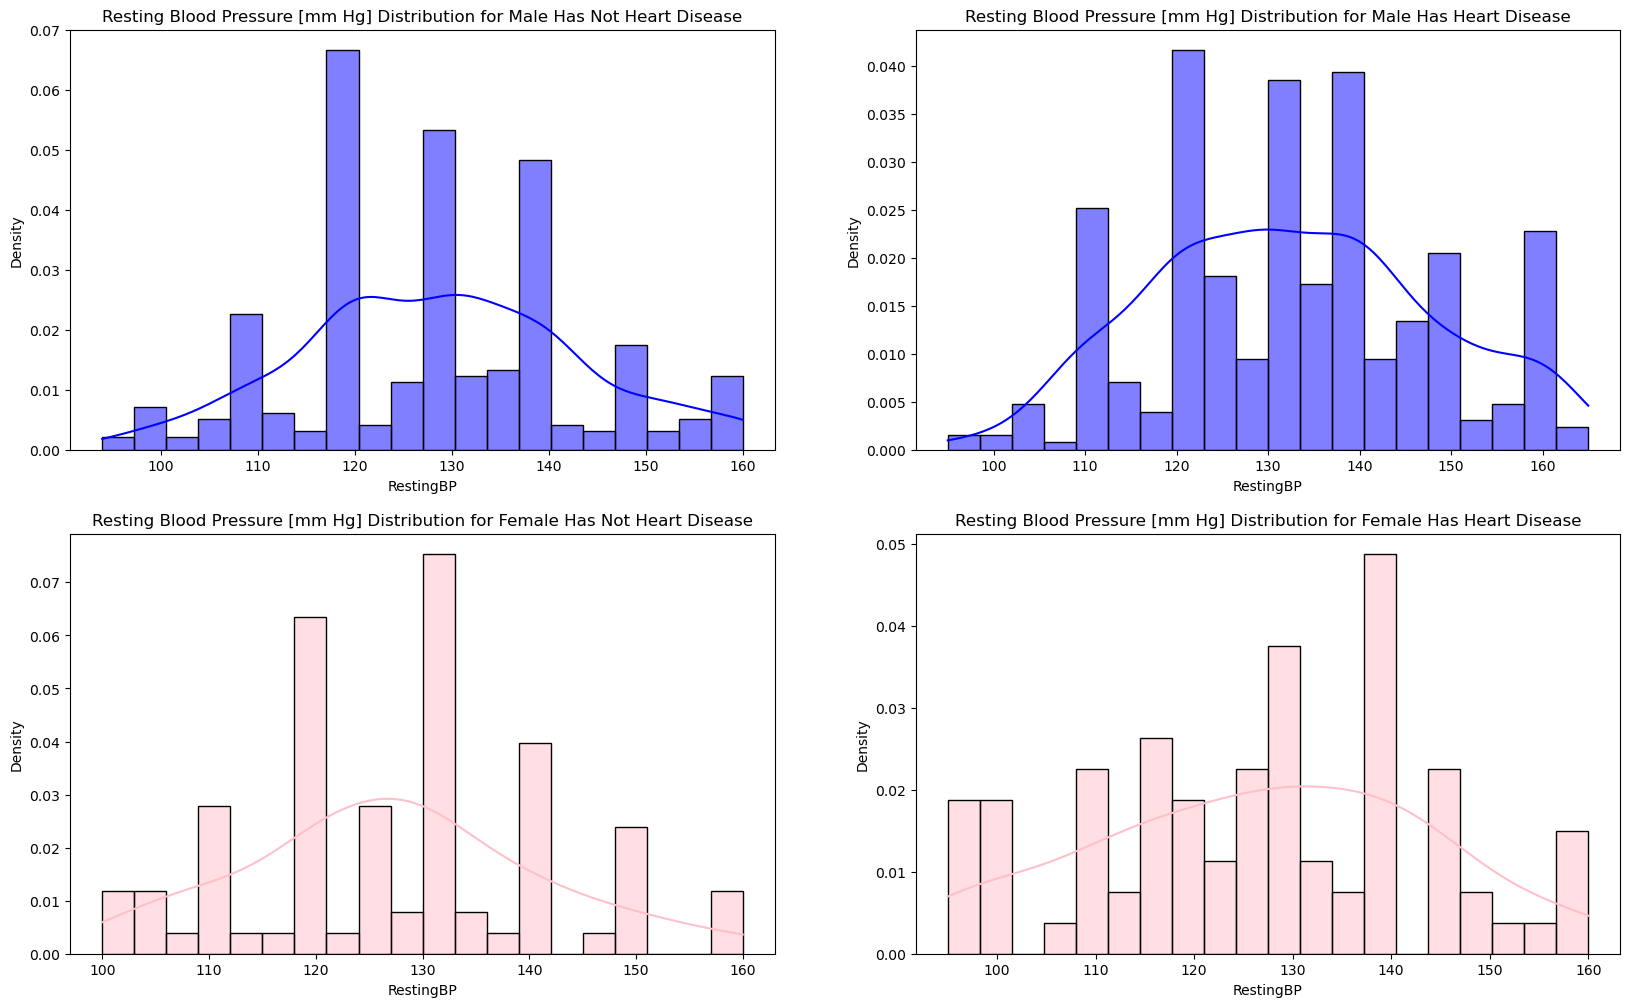

In [30]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['RestingBP'], color='pink', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['RestingBP'], color='pink', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Female Has Heart Disease')

plt.show()

## Distribution of Cholesterol

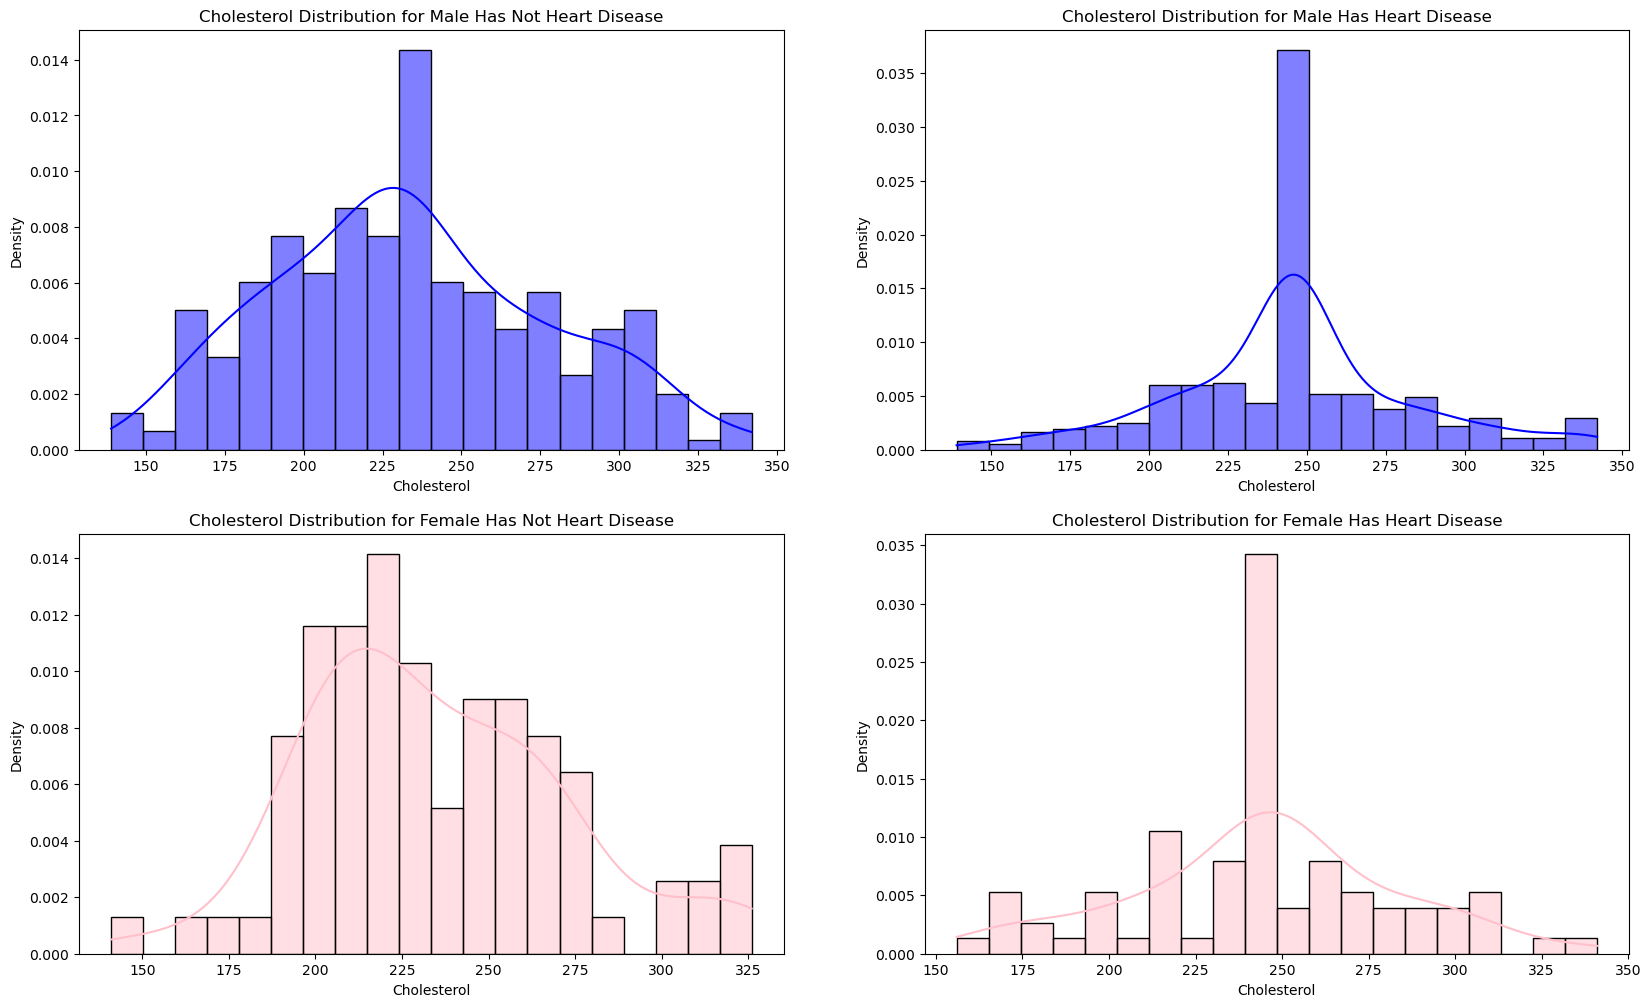

In [31]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['Cholesterol'], color='blue', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['Cholesterol'], color='blue', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['Cholesterol'], color='pink', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['Cholesterol'], color='pink', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Female Has Heart Disease')

plt.show()

## Percentage of fasting For people has heart disease or not

In [32]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 0)]['FastingBS'].value_counts(),
             names = ['otherwise','FastingBS > 120 mg'],
             template = 'plotly_dark',
             title = 'The Percentage of FastingBS in For People has Not Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

In [33]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 1)]['FastingBS'].value_counts(),
             names = ['otherwise','FastingBS > 120 mg'],
             template = 'plotly_dark',
             title = 'The Percentage of FastingBS in For People has Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

- A higher rate of fasting affects the appearance of heart disease in people

### Resting Electrocardiogram Results (RestingECG) for people has Heart Disease or not

In [34]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 0)]['RestingECG'].value_counts(),
             names = ['Normal','LVH','ST'],
             template = 'plotly_dark',
             title = 'The Percentage of Resting Electrocardiogram Results (RestingECG) in For People has Not Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

In [35]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 1)]['RestingECG'].value_counts(),
             names = ['Normal','ST','LVH'],
             template = 'plotly_dark',
             title = 'The Percentage of Resting Electrocardiogram Results (RestingECG) in For People has Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

## Distribution of Maximum Heart Rate Achieved (MaxHR)

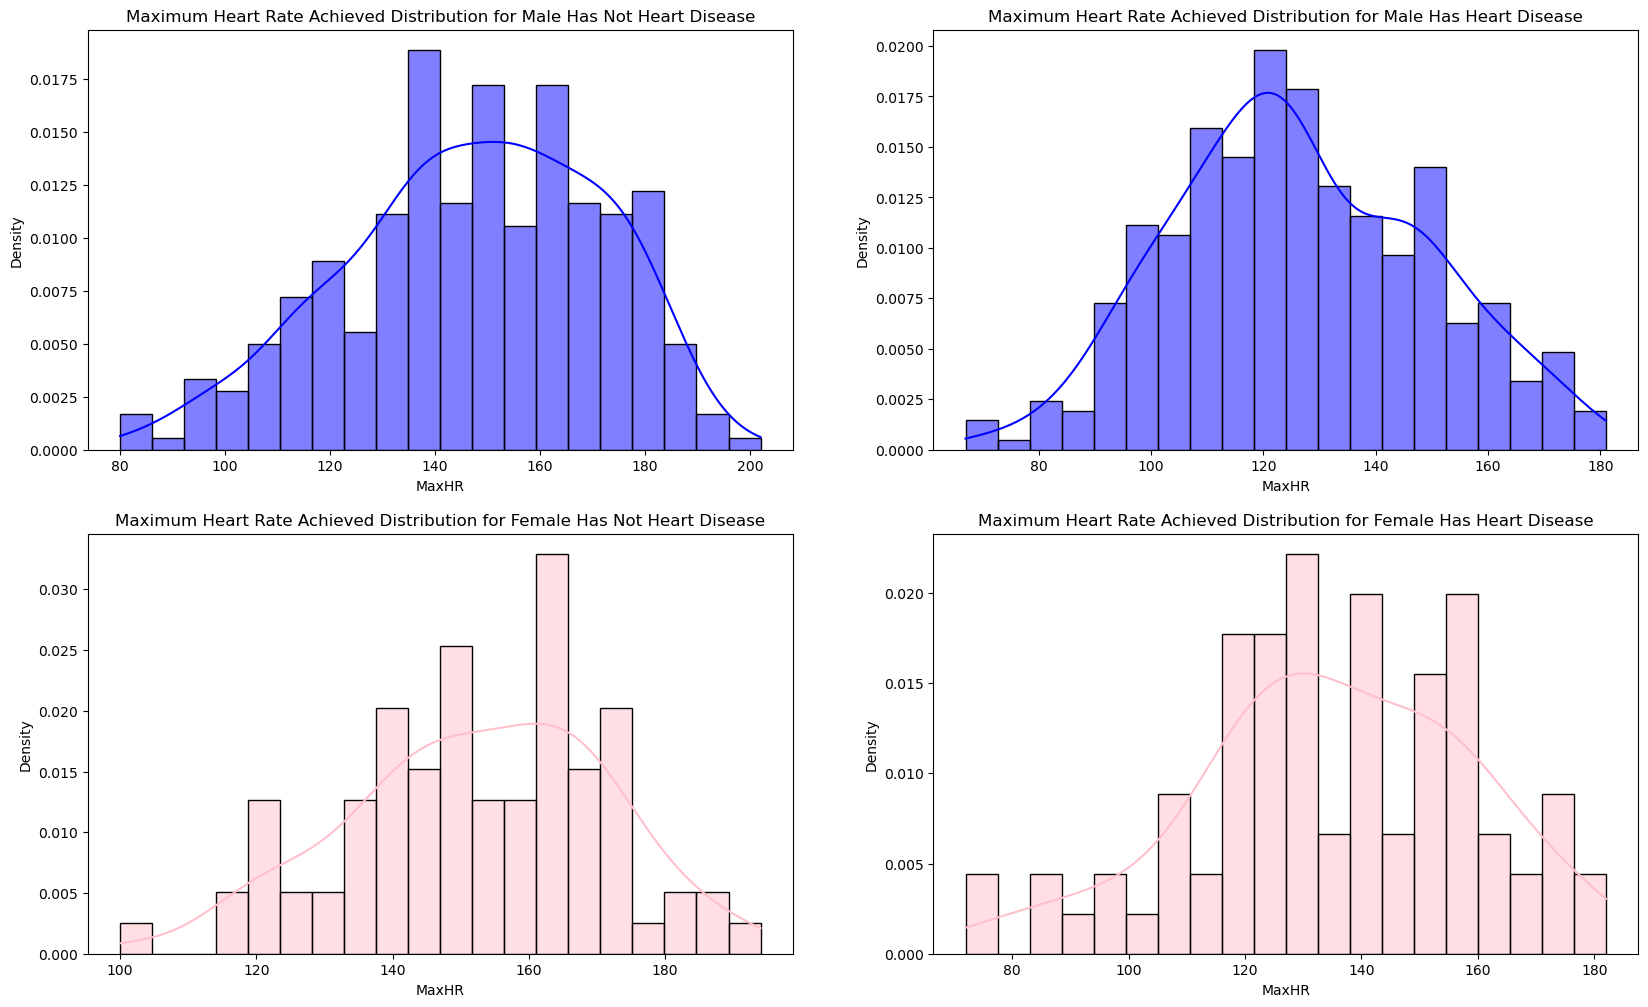

In [36]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['MaxHR'], color='blue', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['MaxHR'], color='blue', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['MaxHR'], color='pink', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['MaxHR'], color='pink', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Female Has Heart Disease')

plt.show()

## Exercise Induced Angina (ExerciseAngina) for people has Heart Disease or not

In [37]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 0)]['ExerciseAngina'].value_counts(),
             names = ['No','Yes'],
             template = 'plotly_dark',
             title = 'The Percentage of Exercise Induced Angina (ExerciseAngina) in For People has Not Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

In [38]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 1)]['ExerciseAngina'].value_counts(),
             names = ['Yes','No'],
             template = 'plotly_dark',
             title = 'The Percentage of Exercise Induced Angina (ExerciseAngina) in For People has Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

- The Presence of Exercise Results in a higher probability of Angina Pectoris occurring

## Oldpeak for people has Heart Disease or not

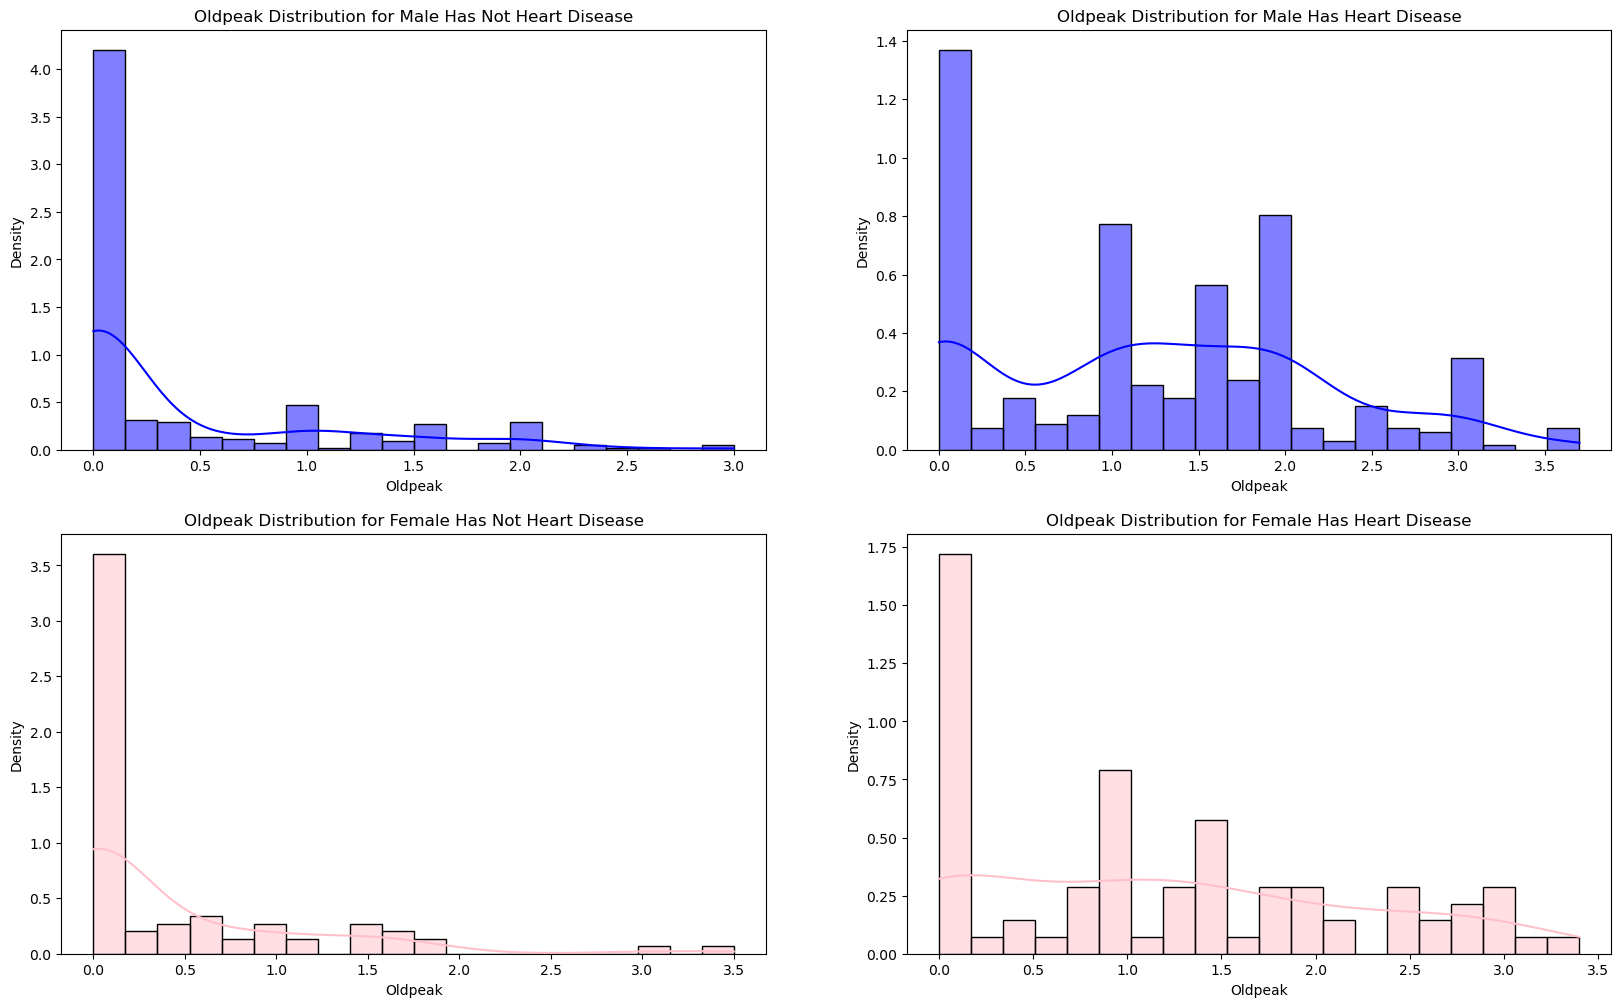

In [39]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['Oldpeak'], color='blue', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['Oldpeak'], color='blue', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['Oldpeak'], color='pink', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['Oldpeak'], color='pink', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Female Has Heart Disease')

plt.show()

- Higher Oldpeak values are strongly correlated with the presence of Heart Disease, indicating more severe heart ischemia or coronary artery disease.

## The slope of the ST Segment on an ECG during Exercise

In [40]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 0)]['ST_Slope'].value_counts(),
             names = ['UpSloping','Flat','DownSloping'],
             template = 'plotly_dark',
             title = 'The Percentage of the slope of the peak exercise ST segment (ST_Slope) in For People has Not Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

In [41]:
fig = px.pie(values = df_cleaned[(df_cleaned['HeartDisease'] == 1)]['ST_Slope'].value_counts(),
             names = ['Flat','UpSloping','DownSloping'],
             template = 'plotly_dark',
             title = 'The Percentage of the slope of the peak exercise ST segment (ST_Slope) in For People has Heart Disease'
             ).update_traces(textinfo='label+percent')

fig.show()

- Flat (flat) is more strongly correlated with heart disease, while Upsloping (Up) and Down (DownSloping) are typically associated with normal heart function or less severe heart issues.

## Total Insights
- Most Ranges of Age between 50 to 60 
- Males are the dominant Category in the data
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina
- A higher rate of fasting affects the appearance of heart disease in people
- The Presence of Exercise Results in a higher probability of Angina Pectoris occurring
- Higher Oldpeak values are strongly correlated with the presence of Heart Disease, indicating more severe heart ischemia or coronary artery disease.
- Flat (flat) is more strongly correlated with heart disease, while Upsloping (Up) and Down (DownSloping) are typically associated with normal heart function or less severe heart issues.


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

## Handling Object DataType

### Encode Object DataType 

In [42]:
column_to_encode = df.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [43]:
# Show Data After some of Encode
df_cleaned.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2,0


In [44]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             824 non-null    int64  
 1   Sex             824 non-null    int32  
 2   ChestPainType   824 non-null    int32  
 3   RestingBP       824 non-null    float64
 4   Cholesterol     824 non-null    float64
 5   FastingBS       824 non-null    int64  
 6   RestingECG      824 non-null    int32  
 7   MaxHR           824 non-null    int64  
 8   ExerciseAngina  824 non-null    int32  
 9   Oldpeak         824 non-null    float64
 10  ST_Slope        824 non-null    int32  
 11  HeartDisease    824 non-null    int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 61.3 KB


## Assign feature and target variables

In [ ]:
X = df_cleaned.drop('HeartDisease' , axis = 1)
y = df_cleaned['HeartDisease']

## Splitting Data 

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [ ]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (618, 11)
Shape of X_Test (206, 11)
Shape of Y_Train (618,)
Shape of Y_Test (206,)


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [ ]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## Logistic Regression

In [ ]:
lr = LogisticRegression()
Kfold(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 83.72318542462534%
Logistic Regression model score on Training data: 86.24595469255664%
Logistic Regression model score on Testing data: 83.49514563106796%


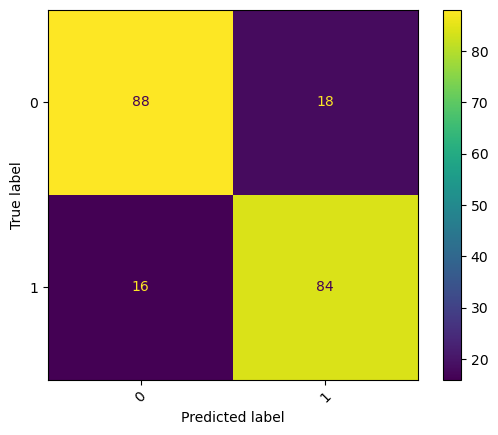

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       106
           1       0.82      0.84      0.83       100

    accuracy                           0.83       206
   macro avg       0.83      0.84      0.83       206
weighted avg       0.84      0.83      0.83       206



## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 100 , max_depth = 50)
Kfold(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 86.5074933881869%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 90.29126213592234%


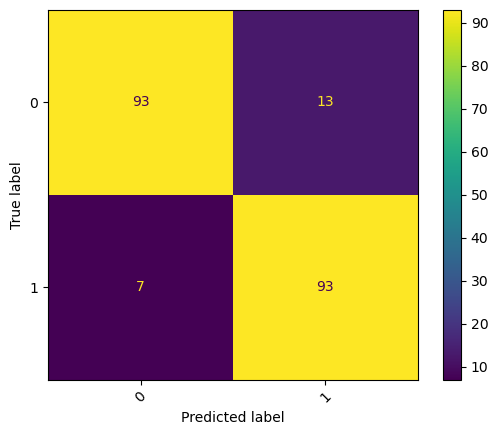

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       106
           1       0.88      0.93      0.90       100

    accuracy                           0.90       206
   macro avg       0.90      0.90      0.90       206
weighted avg       0.90      0.90      0.90       206



## KNN

In [ ]:
knn = KNeighborsClassifier()
Kfold(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 68.54980899206582%
KNN model score on Training data: 77.18446601941747%
KNN model score on Testing data: 65.53398058252428%


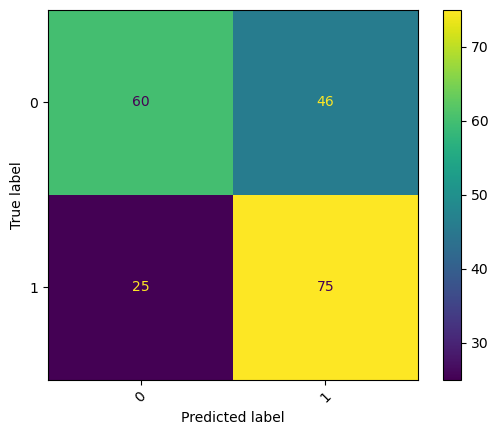

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       106
           1       0.62      0.75      0.68       100

    accuracy                           0.66       206
   macro avg       0.66      0.66      0.65       206
weighted avg       0.66      0.66      0.65       206



## Bagging

In [ ]:
bagg_model = BaggingClassifier(n_estimators=100)
Kfold(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 85.05142521304731%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 85.43689320388349%


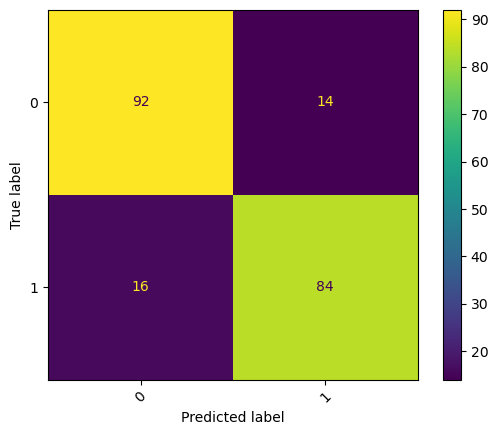

In [ ]:
ConfusionMatrixDisplay.from_estimator(bagg_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       106
           1       0.86      0.84      0.85       100

    accuracy                           0.85       206
   macro avg       0.85      0.85      0.85       206
weighted avg       0.85      0.85      0.85       206



## Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=200)
Kfold(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 87.47722597707906%
Boosting model score on Training data: 99.51456310679612%
Boosting model score on Testing data: 89.32038834951457%


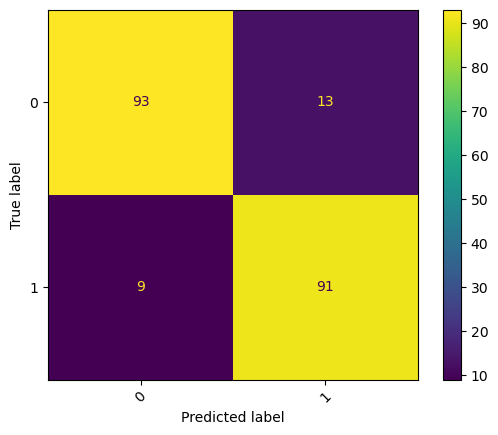

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       106
           1       0.88      0.91      0.89       100

    accuracy                           0.89       206
   macro avg       0.89      0.89      0.89       206
weighted avg       0.89      0.89      0.89       206



## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
Kfold(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 79.46517778430795%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 83.49514563106796%


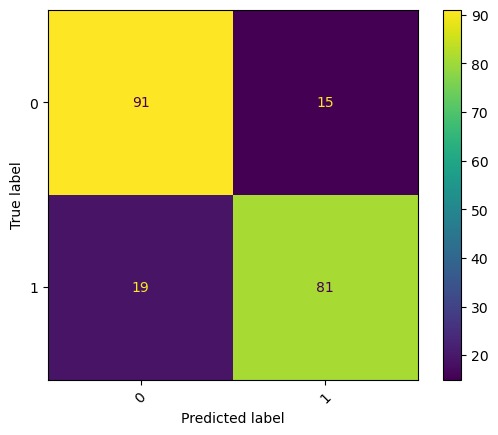

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       106
           1       0.84      0.81      0.83       100

    accuracy                           0.83       206
   macro avg       0.84      0.83      0.83       206
weighted avg       0.84      0.83      0.83       206



## SVM

In [ ]:
svm_model = SVC(gamma='scale',C=10 , kernel='linear')
Kfold(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 82.87834263884808%
SVM model score on Training data: 86.40776699029125%
SVM model score on Testing data: 84.46601941747572%


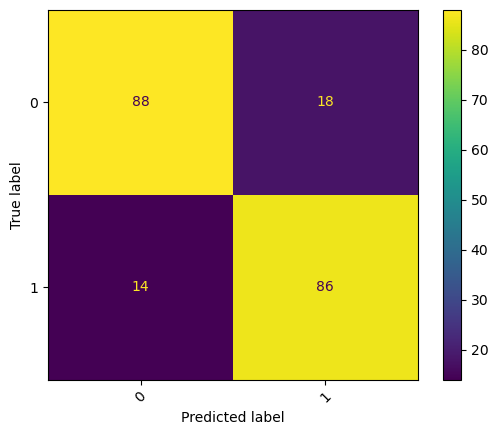

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       106
           1       0.83      0.86      0.84       100

    accuracy                           0.84       206
   macro avg       0.84      0.85      0.84       206
weighted avg       0.85      0.84      0.84       206



## Xgboost

In [ ]:
xgboost = model = XGBClassifier(objective = "binary:logistic" , subsample = 0.7 , min_child_weight = 3,
                                max_depth = 3 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.5,)
Kfold(xgboost, "Xgboost")
train(xgboost, "Xgboost")

Xgboost score on cross validation: 87.59183073758449%
Xgboost model score on Training data: 93.68932038834951%
Xgboost model score on Testing data: 90.29126213592234%


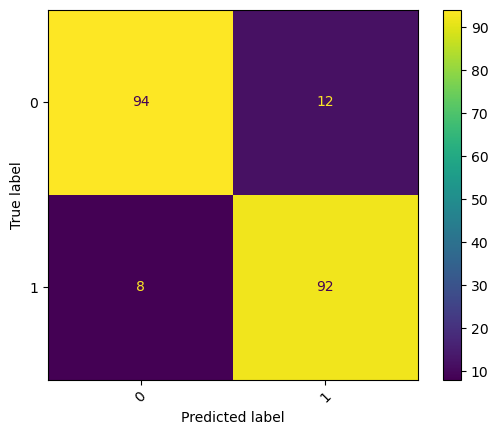

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgboost,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [ ]:
class_report(xgboost)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       106
           1       0.88      0.92      0.90       100

    accuracy                           0.90       206
   macro avg       0.90      0.90      0.90       206
weighted avg       0.90      0.90      0.90       206



- Best Model is RandomForestClassifier with recall 90.0%

## Save RandomForestClassifier Model 

In [ ]:
joblib.dump(rf,'RandomForestClassifier_model.sav')

['RandomForestClassifier_model.sav']